In [127]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
G = nx.DiGraph()

In [129]:
df = pd.read_csv('2024.csv')
# week_1_df = df
week_1_df = df[df['Wk'].isin([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])]

In [130]:
print(week_1_df)

       Wk  Day        Date   Time             Home   xG Score  xG.1  \
0     1.0  Fri  2023-08-11  20:00          Burnley  0.3   0–3   1.9   
1     1.0  Sat  2023-08-12  12:30          Arsenal  0.8   2–1   1.2   
2     1.0  Sat  2023-08-12  15:00          Everton  2.7   0–1   1.5   
3     1.0  Sat  2023-08-12  15:00    Sheffield Utd  0.5   0–1   1.9   
4     1.0  Sat  2023-08-12  15:00         Brighton  4.0   4–1   1.5   
..    ...  ...         ...    ...              ...  ...   ...   ...   
185  19.0  Wed  2023-12-27  20:15          Everton  1.0   1–3   2.4   
186  19.0  Thu  2023-12-28  19:30         Brighton  3.2   4–2   2.3   
187  19.0  Thu  2023-12-28  20:15          Arsenal  2.7   0–2   1.4   
248  18.0  Tue  2024-02-20  19:30  Manchester City  2.3   1–0   0.4   
278  17.0  Wed  2024-03-13  19:30      Bournemouth  2.3   4–3   2.0   

                Away  Attendance                                   Venue  \
0    Manchester City     21572.0                               Turf Moo

In [131]:
edgelist = list(zip(week_1_df['Home'], week_1_df['Away'], week_1_df['cost']))
print(edgelist)

[('Burnley', 'Manchester City', -1.6), ('Arsenal', "Nott'ham Forest", -0.3999999999999999), ('Everton', 'Fulham', 1.2000000000000002), ('Sheffield Utd', 'Crystal Palace', -1.4), ('Brighton', 'Luton Town', 2.5), ('Bournemouth', 'West Ham', 0.1999999999999999), ('Newcastle Utd', 'Aston Villa', 1.4999999999999998), ('Brentford', 'Tottenham', 0.9000000000000001), ('Chelsea', 'Liverpool', 0.0999999999999998), ('Manchester Utd', 'Wolves', 0.0), ("Nott'ham Forest", 'Sheffield Utd', 0.8999999999999999), ('Fulham', 'Brentford', -3.2), ('Liverpool', 'Bournemouth', 1.7), ('Wolves', 'Brighton', -0.1), ('Tottenham', 'Manchester Utd', -0.4000000000000001), ('Manchester City', 'Newcastle Utd', 0.7), ('Aston Villa', 'Everton', 2.3), ('West Ham', 'Chelsea', -0.7), ('Crystal Palace', 'Arsenal', -1.0), ('Chelsea', 'Luton Town', 1.8000000000000005), ('Bournemouth', 'Tottenham', -1.4), ('Everton', 'Wolves', 0.1999999999999999), ('Brentford', 'Crystal Palace', 0.1999999999999999), ('Manchester Utd', "Nott'h

In [132]:
mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)

In [133]:
nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))

In [134]:
for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)

edge_labels = nx.get_edge_attributes(G, 'weight')

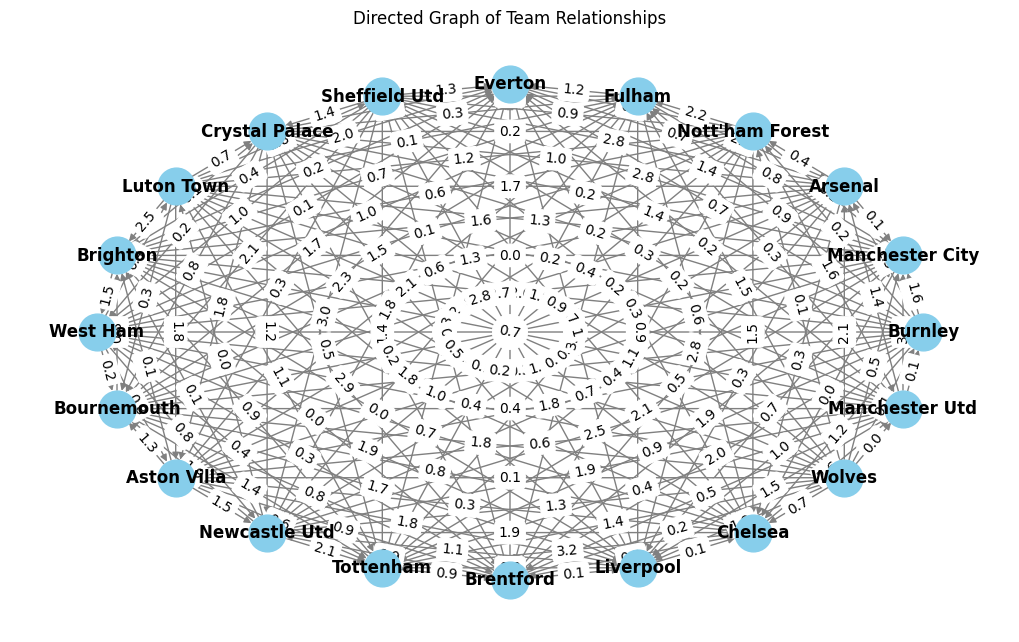

In [135]:
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 6))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph of Team Relationships")
plt.show()

In [136]:
pagerank = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

In [137]:
sorted_by_value = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
rankings = {}
# Print in sorted order by value
for i, (key, value) in enumerate(sorted_by_value.items(), start=1):
    rankings[key] = i
    print(f"{i}. {key}: {value}")

1. Newcastle Utd: 0.11545988696692207
2. Aston Villa: 0.11038092460849909
3. Manchester City: 0.09059818933578752
4. Liverpool: 0.0883063903338435
5. Tottenham: 0.07329717682067051
6. Chelsea: 0.06816963884323578
7. Arsenal: 0.06604792778353585
8. Bournemouth: 0.059745967891331596
9. Everton: 0.05108798153138102
10. Manchester Utd: 0.04864432873462921
11. Nott'ham Forest: 0.0408549174744422
12. Crystal Palace: 0.034253136027354275
13. Brentford: 0.029429253058286947
14. Wolves: 0.025661756733881692
15. Brighton: 0.02477980758118191
16. Fulham: 0.022134114368615405
17. West Ham: 0.020418722191410332
18. Luton Town: 0.011270080195063802
19. Sheffield Utd: 0.01020056979385624
20. Burnley: 0.009259229726071119


In [138]:
rankings

{'Newcastle Utd': 1,
 'Aston Villa': 2,
 'Manchester City': 3,
 'Liverpool': 4,
 'Tottenham': 5,
 'Chelsea': 6,
 'Arsenal': 7,
 'Bournemouth': 8,
 'Everton': 9,
 'Manchester Utd': 10,
 "Nott'ham Forest": 11,
 'Crystal Palace': 12,
 'Brentford': 13,
 'Wolves': 14,
 'Brighton': 15,
 'Fulham': 16,
 'West Ham': 17,
 'Luton Town': 18,
 'Sheffield Utd': 19,
 'Burnley': 20}

## Compare Results

In [139]:
week_4_df = df[df['Wk'].isin([20])]
week_4_df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Winner,cost
188,20.0,Sat,2023-12-30,12:30,Luton Town,2.3,2–3,1.5,Chelsea,11041.0,Kenilworth Road Stadium,Paul Tierney,Chelsea,0.8
189,20.0,Sat,2023-12-30,15:00,Aston Villa,3.2,3–2,1.2,Burnley,41613.0,Villa Park,Stuart Attwell,Aston Villa,2.0
190,20.0,Sat,2023-12-30,15:00,Wolves,1.9,3–0,0.4,Everton,31639.0,Molineux Stadium,Thomas Bramall,Wolves,1.5
191,20.0,Sat,2023-12-30,15:00,Manchester City,2.2,2–0,0.3,Sheffield Utd,53108.0,Etihad Stadium,David Coote,Manchester City,1.9
192,20.0,Sat,2023-12-30,15:00,Crystal Palace,1.0,3–1,1.4,Brentford,25472.0,Selhurst Park,Robert Jones,Crystal Palace,-0.4
193,20.0,Sat,2023-12-30,17:30,Nott'ham Forest,0.7,2–1,0.8,Manchester Utd,29529.0,The City Ground,Tim Robinson,Nott'ham Forest,-0.1
194,20.0,Sun,2023-12-31,14:00,Tottenham,2.3,3–1,1.7,Bournemouth,61780.0,Tottenham Hotspur Stadium,Simon Hooper,Tottenham,0.6
195,20.0,Sun,2023-12-31,14:00,Fulham,1.2,2–1,1.6,Arsenal,24444.0,Craven Cottage,Joshua Smith,Fulham,-0.4
196,20.0,Mon,2024-01-01,20:00,Liverpool,7.0,4–2,0.6,Newcastle Utd,57471.0,Anfield,Anthony Taylor,Liverpool,6.4
197,20.0,Tue,2024-01-02,19:30,West Ham,0.7,0–0,2.3,Brighton,62462.0,London Stadium,Samuel Barrott,Draw,-1.6


In [140]:
def project_winner(row):
    home_rank = rankings.get(row["Home"], float('inf'))
    away_rank = rankings.get(row["Away"], float('inf'))
    
    # Project a tie if the ranks are within 3 spots
    if abs(home_rank - away_rank) <= 3:
        return "Draw"
    elif home_rank < away_rank:
        return row["Home"]
    else:
        return row["Away"]

# Apply function to each row to create a new 'Projected Winner' column
week_4_df["Projected Winner"] = week_4_df.apply(project_winner, axis=1)

C:\Users\jacob.hyatt\AppData\Local\Temp\ipykernel_4276\1445039471.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_4_df["Projected Winner"] = week_4_df.apply(project_winner, axis=1)


In [141]:
week_4_df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Winner,cost,Projected Winner
188,20.0,Sat,2023-12-30,12:30,Luton Town,2.3,2–3,1.5,Chelsea,11041.0,Kenilworth Road Stadium,Paul Tierney,Chelsea,0.8,Chelsea
189,20.0,Sat,2023-12-30,15:00,Aston Villa,3.2,3–2,1.2,Burnley,41613.0,Villa Park,Stuart Attwell,Aston Villa,2.0,Aston Villa
190,20.0,Sat,2023-12-30,15:00,Wolves,1.9,3–0,0.4,Everton,31639.0,Molineux Stadium,Thomas Bramall,Wolves,1.5,Everton
191,20.0,Sat,2023-12-30,15:00,Manchester City,2.2,2–0,0.3,Sheffield Utd,53108.0,Etihad Stadium,David Coote,Manchester City,1.9,Manchester City
192,20.0,Sat,2023-12-30,15:00,Crystal Palace,1.0,3–1,1.4,Brentford,25472.0,Selhurst Park,Robert Jones,Crystal Palace,-0.4,Draw
193,20.0,Sat,2023-12-30,17:30,Nott'ham Forest,0.7,2–1,0.8,Manchester Utd,29529.0,The City Ground,Tim Robinson,Nott'ham Forest,-0.1,Draw
194,20.0,Sun,2023-12-31,14:00,Tottenham,2.3,3–1,1.7,Bournemouth,61780.0,Tottenham Hotspur Stadium,Simon Hooper,Tottenham,0.6,Draw
195,20.0,Sun,2023-12-31,14:00,Fulham,1.2,2–1,1.6,Arsenal,24444.0,Craven Cottage,Joshua Smith,Fulham,-0.4,Arsenal
196,20.0,Mon,2024-01-01,20:00,Liverpool,7.0,4–2,0.6,Newcastle Utd,57471.0,Anfield,Anthony Taylor,Liverpool,6.4,Draw
197,20.0,Tue,2024-01-02,19:30,West Ham,0.7,0–0,2.3,Brighton,62462.0,London Stadium,Samuel Barrott,Draw,-1.6,Draw


In [142]:
correct_predictions = (week_4_df["Projected Winner"] == week_4_df["Winner"]).sum()
total_predictions = len(week_4_df)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Accuracy of projected winners: {accuracy:.2f}%")

Accuracy of projected winners: 40.00%
